In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ipl.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
df.shape

(76014, 15)

In [4]:
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [5]:
df['mid'] = df['mid'].astype('object')

df['striker'] = df['striker'].astype('object')

df['non-striker'] = df['non-striker'].astype('object')


In [6]:
#Date needs to be changed to date time format

from datetime import datetime

df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))


In [7]:
df_cat = df.select_dtypes('O')
df_cat.columns

Index(['mid', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler', 'striker',
       'non-striker'],
      dtype='object')

In [8]:
df_num = df.select_dtypes(np.number)
df_num.columns

Index(['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total'], dtype='object')

In [9]:
df_cat.describe()

,mid,venue,bat_team,bowl_team,batsman,bowler,striker,non-striker
count,76014,76014,76014,76014,76014,76014,76014,76014
unique,617,35,14,14,411,329,155,88
top,309,M Chinnaswamy Stadium,Mumbai Indians,Delhi Daredevils,SK Raina,Harbhajan Singh,4,0
freq,132,7443,10213,10245,1921,1404,2266,12246


In [10]:
df_num.describe()

,runs,wickets,overs,runs_last_5,wickets_last_5,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,74.889349,2.415844,9.783068,33.216434,1.120307,160.901452
std,48.823327,2.015207,5.772587,14.914174,1.053343,29.246231
min,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,34.000000,1.000000,4.600000,24.000000,0.000000,142.000000
50%,70.000000,2.000000,9.600000,34.000000,1.000000,162.000000
75%,111.000000,4.000000,14.600000,43.000000,2.000000,181.000000
max,263.000000,10.000000,19.600000,113.000000,7.000000,263.000000


In [11]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

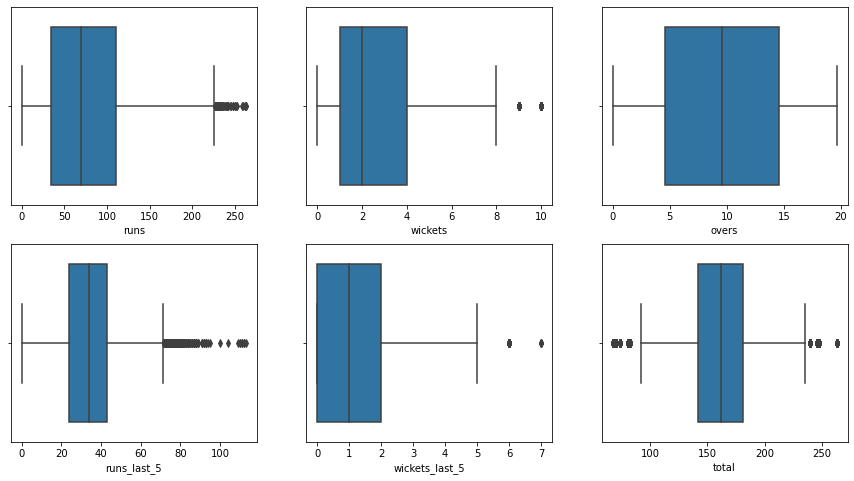

In [12]:
fig,ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15,8))

for i,j in zip(df_num.columns,ax.flatten()):
    sns.boxplot(df_num[i],ax = j)
    
plt.show()

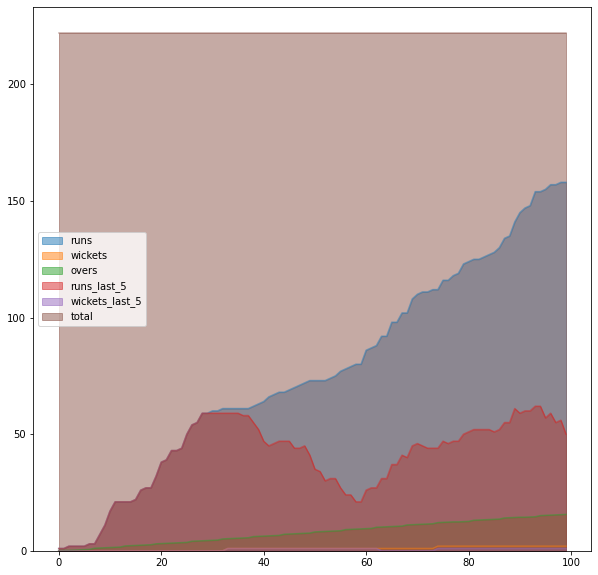

In [13]:
#Using first 100 observations to understand how the numeric columns contribute to the data

df_num[:100].plot(kind = 'area', figsize = (10,10), stacked = False)
plt.show()

<Figure size 2160x2880 with 0 Axes>

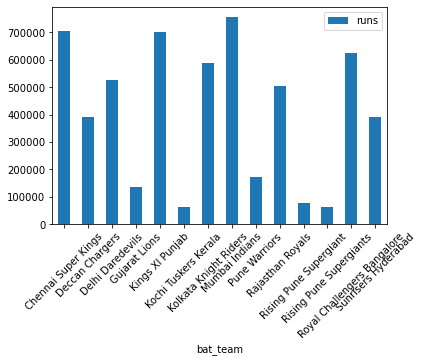

In [14]:
plt.figure(figsize = (30,40))

pd.pivot_table(data = df, index = 'bat_team',values = 'runs',aggfunc = np.sum).plot(kind = 'bar')
plt.xticks(rotation= 45)
plt.show()


<Figure size 1080x864 with 0 Axes>

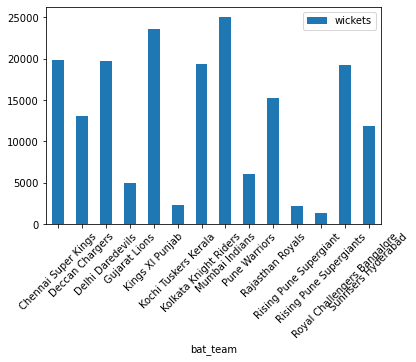

In [15]:
plt.figure(figsize = (15,12))
pd.pivot_table(data = df, index = 'bat_team',values = 'wickets',aggfunc = np.sum).plot(kind = 'bar')
plt.xticks(rotation= 45)
plt.show()

<Figure size 1080x864 with 0 Axes>

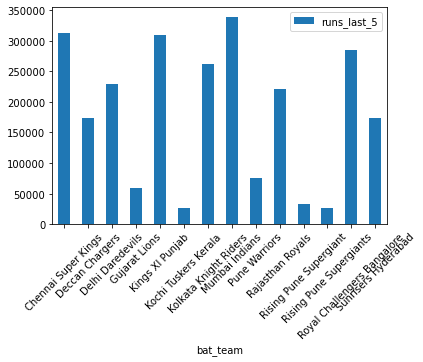

In [16]:
plt.figure(figsize = (15,12))
pd.pivot_table(data = df, index = 'bat_team',values = 'runs_last_5',aggfunc = np.sum).plot(kind = 'bar')
plt.xticks(rotation= 45)
plt.show()


<Figure size 1080x864 with 0 Axes>

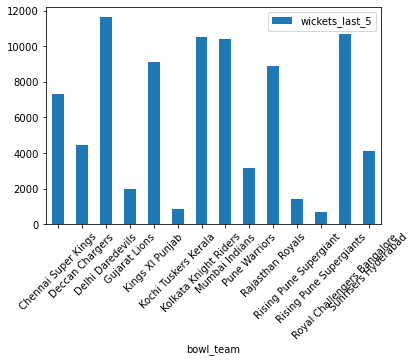

In [17]:
plt.figure(figsize = (15,12))
pd.pivot_table(data = df, index = 'bowl_team',values = 'wickets_last_5',aggfunc = np.sum).plot(kind = 'bar')
plt.xticks(rotation= 45)
plt.show()

In [18]:
plt.figure(figsize = (15,8))
pd.pivot_table(data = df, index = 'bat_team',values = 'total',aggfunc = np.max)


,total
bat_team,
Chennai Super Kings,246
Deccan Chargers,214
Delhi Daredevils,231
Gujarat Lions,208
Kings XI Punjab,232
Kochi Tuskers Kerala,178
Kolkata Knight Riders,222
Mumbai Indians,218
Pune Warriors,192


<Figure size 1080x576 with 0 Axes>

In [19]:
#Feature selection

#Removing unwanted columns

df = df.drop(['date','mid','venue','batsman','bowler','striker','non-striker'],axis = 1)


In [20]:
df.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [21]:
#Filtering current/active teams

df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [22]:
df['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [23]:
active_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians','Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

#Filtering only active teams using isin method

df = df[(df['bat_team'].isin(active_teams)) & (df['bowl_team'].isin(active_teams))]


In [24]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

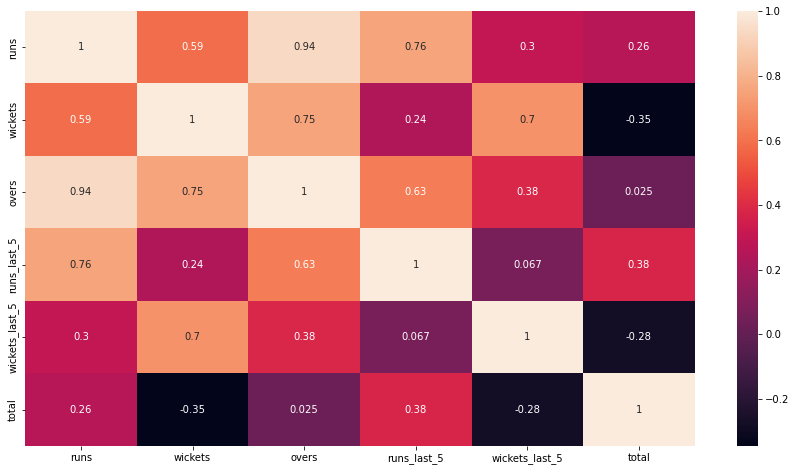

In [25]:
#Checking for multicollinearity using heatmap


plt.figure(figsize = (15,8))

sns.heatmap(df.corr(),annot = True)

plt.show()

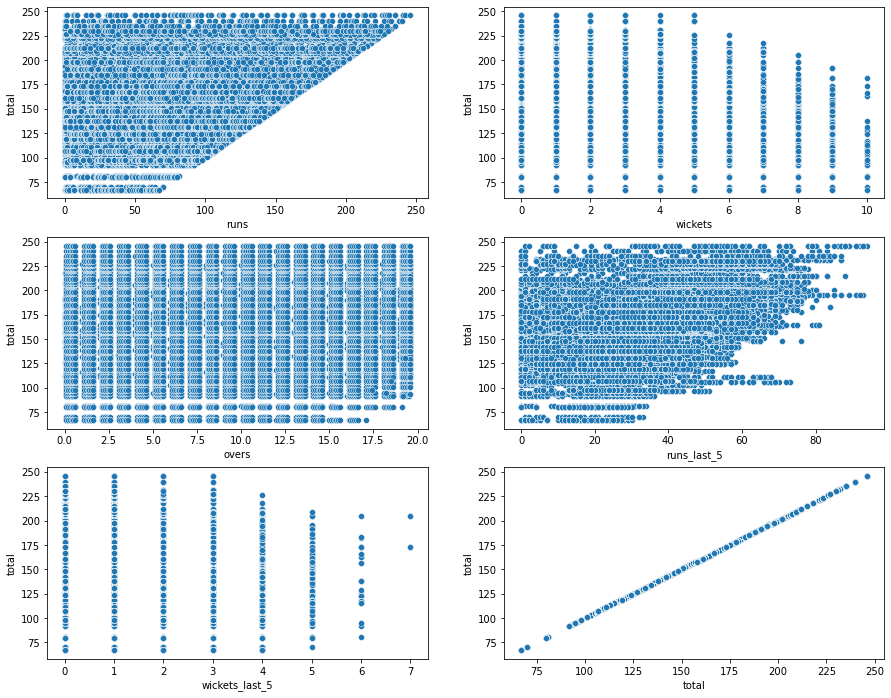

In [26]:


fig,ax = plt.subplots(nrows = 3,ncols = 2, figsize = (15,12))
df_num = df.select_dtypes(np.number)
for i,j in zip(df_num.columns,ax.flatten()):
    sns.scatterplot(df_num[i],df['total'],ax = j)
    

plt.show()


In [27]:
#Model building


x = df.drop('total',axis = 1)
y = df['total']


#Dummy encoding
x = pd.get_dummies(x,drop_first = True)



In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)



In [29]:
linreg = LinearRegression()

linreg.fit(x_train,y_train)

y_pred = linreg.predict(x_test)

# checking for scores
from sklearn import metrics

# Mean Absolute Error
print('MAE: ', metrics.mean_absolute_error(y_test , y_pred))

# Mean Squared Error  
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

# Root Mean Squared Error
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE:  15.378457503904517
MSE:  428.09118302918995
RMSE:  20.69036449725306
